<a href="https://colab.research.google.com/github/sSteam-cube/P_345-P_343-Laboratory-Resources/blob/main/Linear_fitting/Least_square_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def least_squares_analysis(y_values, x_values=None, title="Least Squares Analysis"):
    """
    Perform least squares regression, show plot with regression results,
    and display the calculation table below.

    Parameters
    ----------
    y_values : list or array
        Dependent variable values (y).
    x_values : list or array, optional
        Independent variable values (x). If None, uses 1,2,...,N.
    title : str, optional
        Title of the combined figure.
    """

    # Convert to numpy arrays
    y = np.array(y_values, dtype=float)
    if x_values is None:
        x = np.arange(1, len(y)+1, dtype=float)
    else:
        x = np.array(x_values, dtype=float)

    # Perform least-squares fit: y = m*x + c
    A = np.vstack([x, np.ones(len(x))]).T
    slope, intercept = np.linalg.lstsq(A, y, rcond=None)[0]

    # Fitted values and residuals
    y_fit = slope * x + intercept
    residuals = y - y_fit

    # Error in slope (standard error)
    N = len(x)
    Sxx = np.sum((x - np.mean(x))**2)
    sigma_y = np.sqrt(np.sum(residuals**2) / (N-2))
    err_slope = sigma_y / np.sqrt(Sxx)

    # Create DataFrame table
    df = pd.DataFrame({
        "x": x,
        "y": y,
        "x²": x**2,
        "xy": x*y
    })
    totals = pd.DataFrame({
        "x": [np.sum(x)],
        "y": [np.sum(y)],
        "x²": [np.sum(x**2)],
        "xy": [np.sum(x*y)]
    }, index=["Σ"])
    table = pd.concat([df, totals])

    # --- Combined Figure: Plot + Table ---
    fig, (ax1, ax2) = plt.subplots(
        nrows=2, ncols=1, figsize=(10,9),
        gridspec_kw={"height_ratios": [3, 1]}  # plot taller than table
    )

    # Top: Regression plot
    ax1.scatter(x, y, color='blue', label="Data points")
    ax1.plot(x, y_fit, color='red', label="Best Fit Line")

    textstr = '\n'.join((
        f"Slope (m)     = {slope:.4f}",
        f"Intercept (c) = {intercept:.4f}",
        f"Slope Error   = {err_slope:.4f}"
    ))
    ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes,
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="wheat", alpha=0.5))

    ax1.set_xlabel("m")
    ax1.set_ylabel("xₘ")
    ax1.legend()
    # ax1.set_title(f"Least Squares Fit of xₘ vs m")
    ax1.grid(True)

    # Bottom: Table
    ax2.axis("off")
    table_fig = ax2.table(cellText=table.round(3).values,
                          colLabels=table.columns,
                          rowLabels=table.index,
                          cellLoc='center', loc='center')

    table_fig.auto_set_font_size(False)
    table_fig.set_fontsize(10)
    table_fig.scale(1.3, 1.3)

    plt.suptitle(title, fontsize=14, y=0.98)
    plt.tight_layout()
    plt.show()

    # Return results in case needed programmatically
    return {
        "slope": slope,
        "intercept": intercept,
        "slope_error": err_slope,
        "table": table
    }


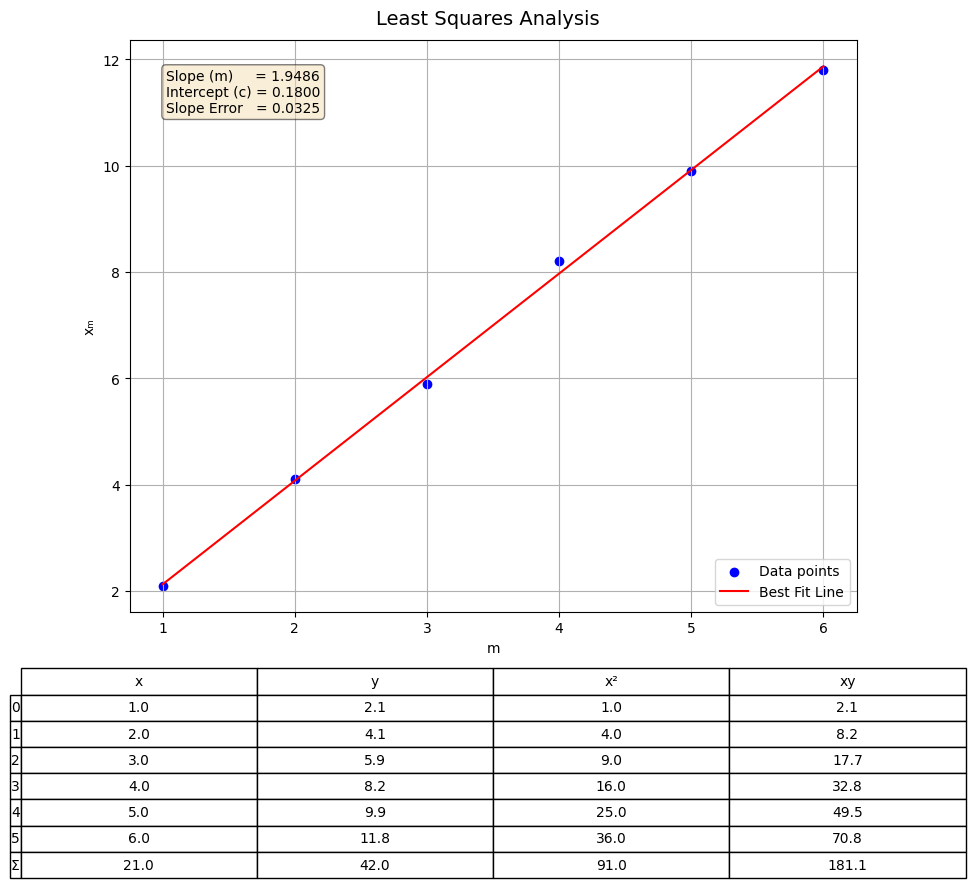

{'slope': np.float64(1.9485714285714277),
 'intercept': np.float64(0.17999999999999666),
 'slope_error': np.float64(0.032450904833144285),
 'table':       x     y    x²     xy
 0   1.0   2.1   1.0    2.1
 1   2.0   4.1   4.0    8.2
 2   3.0   5.9   9.0   17.7
 3   4.0   8.2  16.0   32.8
 4   5.0   9.9  25.0   49.5
 5   6.0  11.8  36.0   70.8
 Σ  21.0  42.0  91.0  181.1}

In [3]:
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([2.1, 4.1, 5.9, 8.2, 9.9, 11.8])

least_squares_analysis(y, x)